# CUSTOMER CHURN  PREDICTION
Customer churn prediction uses data analysis and machine learning to anticipate which customers are likely to leave a product or service, enabling businesses to take proactive steps to retain them and improve overall customer satisfaction.

## Import Required Library 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# read csv file
df= pd.read_csv('Churn_Modelling.csv')


In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data Information


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Check Null Values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Find duplicate value
df.duplicated().sum()

0

In [7]:
print('Number of Rows:',df.shape[0])
print('Number of Columns:',df.shape[1])

Number of Rows: 10000
Number of Columns: 14


In [8]:
# Data infromation
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [9]:
df.nunique()


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
# Print All columns
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Data Preprocessing & EDA

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Drop unused columns  Dataset
drop_columns = ['RowNumber', 'CustomerId', 'Surname']
df.drop(columns=drop_columns,inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Balance

In [14]:
# to check inblanced data
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

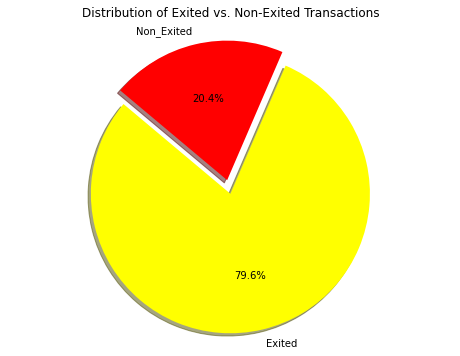

In [15]:

# Assuming 'is_fraud' is a binary column (0 for non_Exited, 1 for Exited)
Exited_count = df['Exited'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
labels = ['Exited', 'Non_Exited']
sizes =  Exited_count.values
colors = ['yellow', 'red']
explode = (0.1, 0)  # Explode the first slice (Non-Exited)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Exited vs. Non-Exited Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


<AxesSubplot:xlabel='Exited', ylabel='count'>

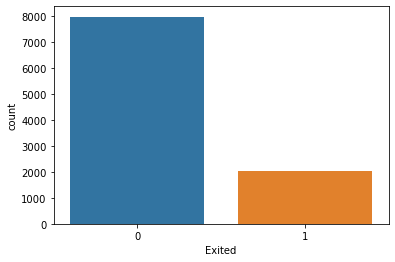

In [16]:
sns.countplot(df['Exited'])

In [17]:
# use Library
from sklearn.utils import resample
# Create two diffrent dataframes  of majority and minority class
df_majority = df[df['Exited']==0]
df_minority = df[df['Exited']==1]

print(df_majority.shape[0])
print(df_minority.shape[0])

7963
2037


In [18]:
df_minority_resample = resample(df_minority,n_samples=7963,random_state=42)
df_minority_resample.shape

(7963, 11)

In [19]:
# check shape
print(df_minority_resample.shape)
print(df_majority.shape)

(7963, 11)
(7963, 11)


In [20]:
# check data balance or not
df_blance = pd.concat([df_minority_resample,df_majority])
df_blance['Exited'].value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

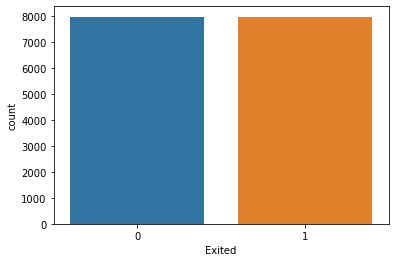

In [21]:
sns.countplot(df_blance['Exited'])

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to be label encoded
categorical_columns = ['Geography','Gender']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Loop through each categorical column and apply label encoding
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Splitting The Dataset

In [25]:
# spliting data 
x=df.drop('Exited',axis=1)
y=df['Exited']

In [26]:
# splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42,stratify=y)

In [27]:
# feature scaling
from sklearn.preprocessing import StandardScaler
 

In [28]:
# StandardScaler 
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [29]:
x_train

array([[ 1.058568  , -0.90593285,  0.90750738, ...,  0.64104192,
        -1.030206  ,  1.04208392],
       [ 0.91362605,  0.30016846,  0.90750738, ...,  0.64104192,
        -1.030206  , -0.62355635],
       [ 1.07927399,  0.30016846, -1.10191942, ...,  0.64104192,
         0.97067965,  0.30812779],
       ...,
       [ 0.16821031, -0.90593285, -1.10191942, ...,  0.64104192,
         0.97067965, -0.55808767],
       [ 0.37527024,  1.50626978,  0.90750738, ...,  0.64104192,
        -1.030206  , -1.35149956],
       [ 1.56586482,  1.50626978,  0.90750738, ..., -1.55996038,
         0.97067965, -1.02692216]])

## Logistic Regression

In [56]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
log=LogisticRegression()

In [57]:
log.fit(x_train,y_train)

LogisticRegression()

In [58]:
y_pred=log.predict(x_test)

## Accuracy

In [59]:
#find accuracy

acc=[]
roc=[]

ac=accuracy_score(y_test,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))


Accuracy 0.805 ROC 0.558384270248677


## RandomForestClassifier

In [36]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
Rc=RandomForestClassifier()

In [38]:
Rc.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
y_pred2=Rc.predict(x_test)

## Accuracy

In [40]:
accuracy_score(y_test,y_pred2)

0.858

In [41]:
recall_score(y_test,y_pred2)

0.43734643734643736

In [42]:
f1_score(y_test,y_pred2)

0.55625

## GradientBoostingClassifier()

In [43]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
Gc=GradientBoostingClassifier()

In [45]:
Gc.fit(x_train,y_train)

GradientBoostingClassifier()

In [46]:
y_pred3=Gc.predict(x_test)

## Accuracy

In [47]:
accuracy_score(y_pred3,y_test)

0.8675

In [48]:
recall_score(y_test,y_pred3)

0.47665847665847666

In [49]:
f1_score(y_test,y_pred3)

0.5941807044410413

## Final Accuracy Score Comparsion

In [50]:
# Add all acccuracy
final_Acc_predection=pd.DataFrame({'Models':['LR','RF','GBC'],'ACC':[accuracy_score(y_test,y_pred),
                                                                            accuracy_score(y_test,y_pred2),
                                                                            accuracy_score(y_test,y_pred3)]})

<AxesSubplot:xlabel='Models', ylabel='ACC'>

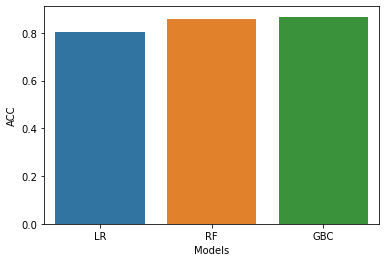

In [53]:
sns.barplot(x=final_Acc_predection['Models'],y=final_Acc_predection['ACC'])